# 지수 이동평균 EMA (Exponetial Moving Average)
- 보다 최근의 값에 가중치를 두면서 이동평균을 계산하는 방법


- 금일의 지수이동평균 = (금일 종가 * EP) + (전일의 지수 이동평균 * (1 - EP))
- EP(평활 계수 : Exponential Percentage) = 2 / (기간 + 1)

- span / alpha 크기 반비례

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# W : 첫주
print("2021년 8월의 첫주 freq = w\n"\
      ,pd.date_range(start = "2021-08", periods=8, freq ='W'))
print("=" * 70)

# 8월 첫날부터 7일씩 8번
print("2021년 8월의 첫날부터 7일간격 freq = 7 *1d \n"\
      , pd.date_range(start = "2021-08", periods=8, freq = 7*"1d"))

In [ ]:
# df만들기
df = pd.DataFrame({
    'week' : pd.date_range(start = "2021-08-06", periods=8, freq = 7*"1d"),
    'sales' : [39, 44, 40, 45, 38, 43, 39, np.nan],
    "EXPONENTIAL" : [0] * 8
    })
display(df)

# 가중치 계싼
span = 3
alpha = 2/(1+span)
print("=" * 70)
print("가중치",alpha)
print("=" * 70)

# EXPONENTIAL 컬럼값 변경
# 한칸씩 이동 
df["EXPONENTIAL"] = df[["sales"]].ewm(span=3).mean().shift(1)
display(df)

In [ ]:
df["예측"] = [str(x-1)+"일차 예측값" if x !=0 else 'NaN' for x in range(len(df))]
display(df)

,week,sales,EXPONENTIAL,예측
0,2021-08-06,39.0,NaN,NaN
1,2021-08-13,44.0,39.000000,0일차 예측값
2,2021-08-20,40.0,42.333333,1일차 예측값
3,2021-08-27,45.0,41.000000,2일차 예측값
4,2021-09-03,38.0,43.133333,3일차 예측값
5,2021-09-10,43.0,40.483871,4일차 예측값
6,2021-09-17,39.0,41.761905,5일차 예측값
7,2021-09-24,NaN,40.370079,6일차 예측값


In [ ]:
# 지수이동평균 함수
def myEWMA(data, span):
  molecule = 0  # 분자
  denominator = 0 # 분모
  alpha = 2.0 / (1+span)
  print("data = ", data)
  ewma = [0] * len(data)
  for i in range(len(data)):
    print("i = ", i)
    molecule = (data[i] + (1.0 - alpha) * molecule)
    denominator += (1 - alpha) ** i

    print("분자 = ",molecule)
    print("분모 = ",denominator)
    ema = molecule / denominator
    print("ema = ", ema)
    print("=" *100)
    ewma[i] = ema
  return ewma

In [ ]:
myEWMA(df['sales'][0:7], 3)

# Apple Stock EMA

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/apple_stock.csv'

In [ ]:
df = pd.read_csv(path)
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df

In [ ]:
# 종가 7일 지수이동평균
df[["Close"]].ewm(span = 7).mean()

# datetime 생성
last_day = datetime(2019, 1, 2)

# 새로운열 종가에 100 추가 해보기
df.loc[last_day,"Close"] = -100  

In [ ]:
df.tail(1)

In [ ]:
# last_day의 "Close" 를 Nan값으로 변경
df.loc[last_day,"Close"] = np.nan

df["Close_7Span_Mean"] = df[["Close"]].ewm(span = 7).mean().shift(1)


df[["Close","Close_7Span_Mean","예측"]].head(10)



,Close,Close_7Span_Mean,예측
Date,,,
2009-12-31,30.104286,NaN,NaT
2010-01-04,30.572857,30.104286,2009-12-31
2010-01-05,30.625713,30.372041,2010-01-04
2010-01-06,30.138571,30.481737,2010-01-05
2010-01-07,30.082857,30.356236,2010-01-06
2010-01-08,30.282858,30.266627,2010-01-07
2010-01-11,30.015715,30.271563,2010-01-08
2010-01-12,29.674286,30.197748,2010-01-11
2010-01-13,30.092857,30.052323,2010-01-12


In [ ]:
# df["예측"] = [str(x-1)+"일차 예측값" if x !=0 else 'NaN' for x in range(len(df))]
# df["예측"] =  [x for x in df.index]
# df['예측'] = df['예측'].shift(1)
# [x for x in df.index]

In [ ]:
df.index

In [ ]:
# 시각화
df[["Close","Close_7Span_Mean"]].plot(figsize = (30,20))

In [ ]:
# 월별 종가 평균
df_monthly = df[["Close"]].resample(rule = 'MS').mean()


df_monthly["Close_3Span_Mean"] = df_monthly["Close"].ewm(span = 3).mean().shift(1)

In [ ]:
df_monthly.plot(figsize = (30, 20))

# 실습 
- ppt 224 ~ 257


## 224~ 235

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({
    'week' : pd.date_range(start = "2021-08-06", periods=8, freq = 7*"1d"),
    'sales' : [39, 44, 40, 45, 38, 43, 39, np.nan],
    "3EMA" : [0] * 8
    })

df["3EMA"] = df[["sales"]].ewm(span = 3).mean().shift(1)

df

In [ ]:
def MyEWMA(data, span):
  ewma = [0] * len(data)
  분자 = 0
  분모 = 0
  alpha = 2.0 /(1.0 + span)
  for i in range(len(data)):
    분자 = (data[i] + (1.0-alpha)* 분자)
    분모 += (1-alpha) ** i
    ewma[i] = 분자/분모
  return ewma


In [ ]:
MyEWMA(df['sales'], 3)

[39.0,
 42.333333333333336,
 41.0,
 43.13333333333333,
 40.483870967741936,
 41.76190476190476,
 40.37007874015748,
 nan]

## 237 ~ 257

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [ ]:
plt.style.use('ggplot')

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/apple_stock.csv'
df = pd.read_csv(path)

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")

# 시각화
df[["Close"]].plot(figsize = (30 ,30))
plt.title("Close Price for Apple")

In [ ]:
last_day = datetime(2019,1,4)
print(last_day)

df.loc[last_day, 'Close'] = np.nan
display(df)

df['Close_7Span_Mean'] = df['Close'].ewm(span = 7).mean().shift(1)
display(df)

df[["Close", "Close_7Span_Mean"]].plot(figsize = (30,20))

In [ ]:
# 월단위 평균가격 df
df_monthly = df[['Close']].resample(rule ="M").mean()

df_monthly["Close_3Month_Mean"] = df_monthly["Close"].ewm(span = 3).mean().shift(1)

df_monthly

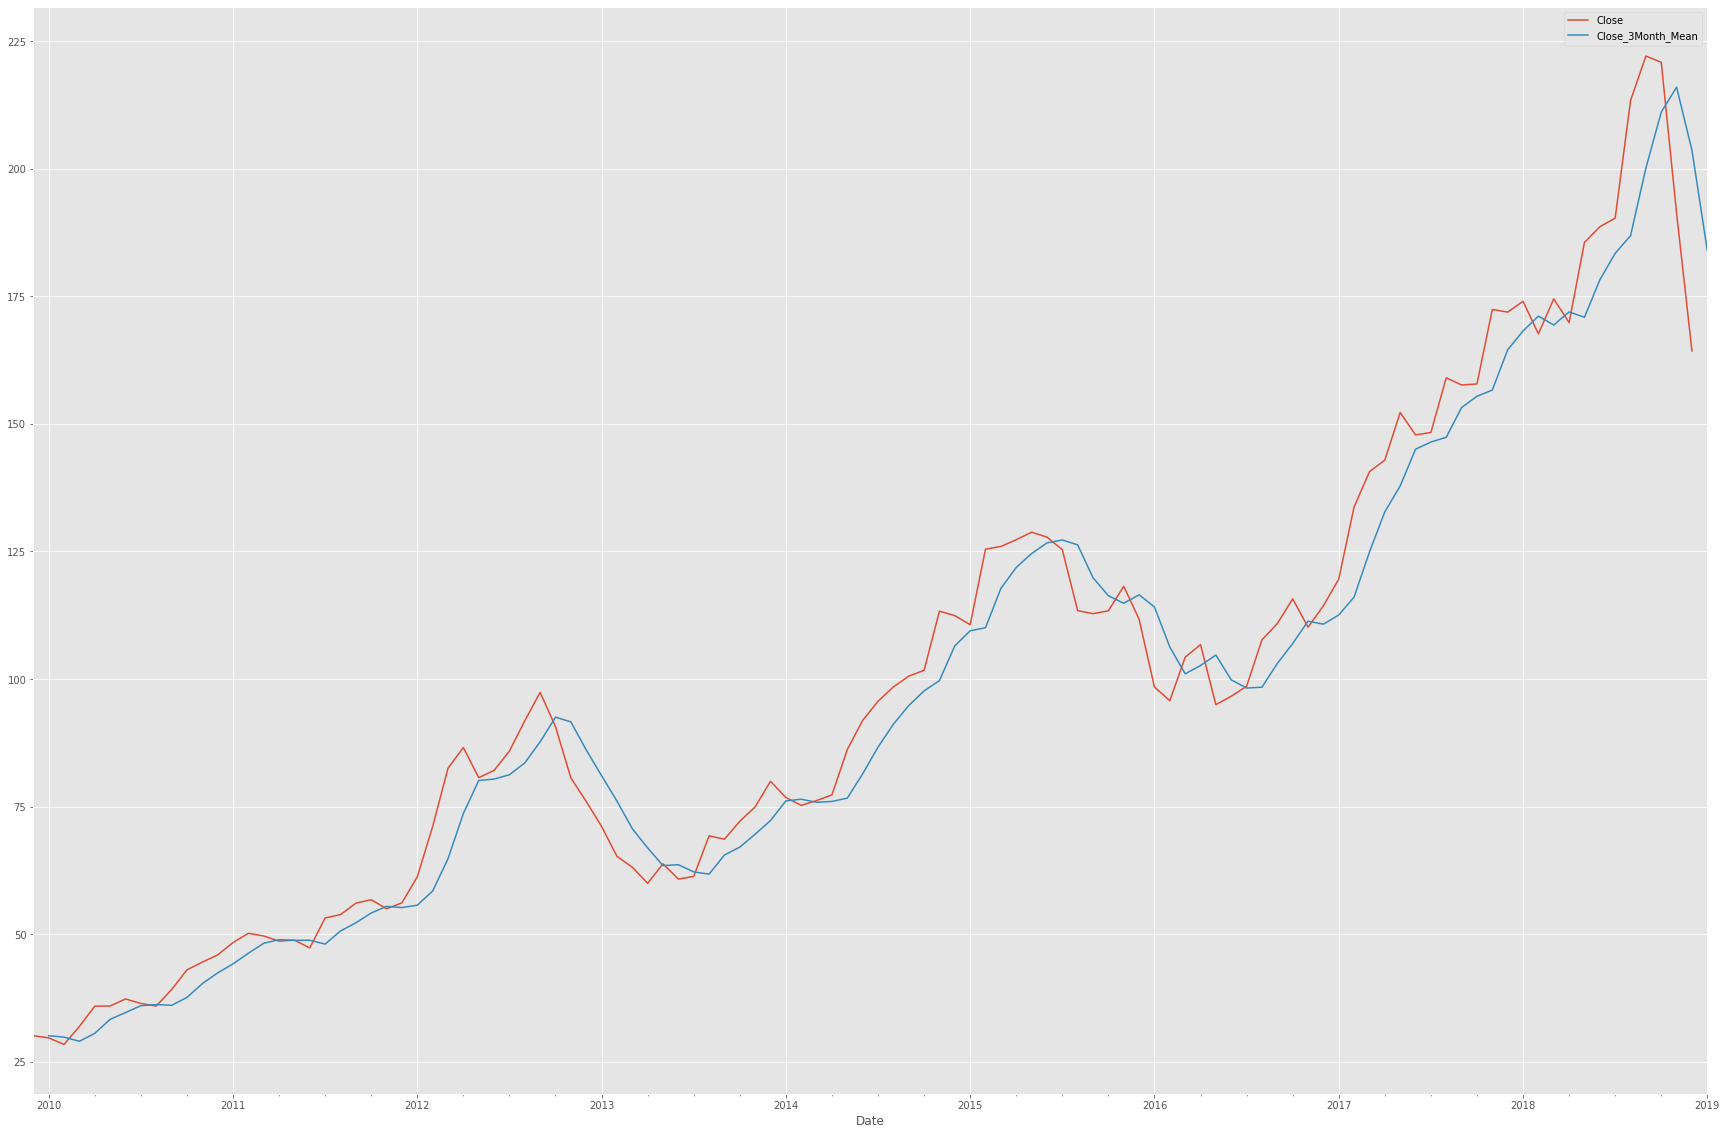

In [ ]:
# 시각화
df_monthly.plot(figsize = (30,20))